In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("./data/weather3.csv")

df.head()

df = df[["AQI"]]

In [2]:
data = np.array(df)
data

array([[80],
       [88],
       [94],
       ...,
       [71],
       [71],
       [72]])

In [3]:
def sequence(data, prev):

    iterable = [data[i:] for i in range(prev + 1)]

    a = [k[:-1] for k in zip(*iterable)]
    b = [k[-1] for k in zip(*iterable)]


    a = np.array(a)
    b = np.array(b)

    b = b.reshape(-1, 1)

    return a, b

In [4]:
x, y = sequence(data, 6)

In [5]:
x[:5]

array([[[80],
        [88],
        [94],
        [91],
        [87],
        [86]],

       [[88],
        [94],
        [91],
        [87],
        [86],
        [84]],

       [[94],
        [91],
        [87],
        [86],
        [84],
        [82]],

       [[91],
        [87],
        [86],
        [84],
        [82],
        [80]],

       [[87],
        [86],
        [84],
        [82],
        [80],
        [79]]])

In [6]:
y[:5]

array([[84],
       [82],
       [80],
       [79],
       [78]])

In [7]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

2024-08-02 04:39:04.361015: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-02 04:39:04.362514: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-02 04:39:04.396614: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-02 04:39:04.397248: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-02 04:39:05.091971: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [8]:
model = Sequential()

model.add(Dense(64, input_dim=x.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

In [9]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,833
Trainable params: 8,833
Non-trainable params: 0
_________________________________________________________________


In [10]:
train_size = round(0.95 * len(x))
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [11]:
x_train.shape

(11064, 6, 1)

In [12]:
y_train.shape

(11064, 1)

In [13]:
history = model.fit(x_train, y_train, validation_split=0.08, epochs = 100)


Epoch 1/100
319/319 [==============================] - 1s 1ms/step - loss: 397.0893 - mae: 8.5327 - val_loss: 47.0584 - val_mae: 2.9194
Epoch 2/100
319/319 [==============================] - 0s 931us/step - loss: 146.7658 - mae: 5.2974 - val_loss: 58.7360 - val_mae: 3.8906
Epoch 3/100
319/319 [==============================] - 0s 943us/step - loss: 142.5633 - mae: 5.2512 - val_loss: 47.7702 - val_mae: 2.7780
Epoch 4/100
319/319 [==============================] - 0s 1ms/step - loss: 140.7152 - mae: 5.1900 - val_loss: 47.6062 - val_mae: 2.9219
Epoch 5/100
319/319 [==============================] - 0s 966us/step - loss: 143.6235 - mae: 5.4644 - val_loss: 70.7776 - val_mae: 5.2992
Epoch 6/100
319/319 [==============================] - 0s 983us/step - loss: 147.7461 - mae: 5.6931 - val_loss: 47.3079 - val_mae: 2.9322
Epoch 7/100
319/319 [==============================] - 0s 995us/step - loss: 142.3317 - mae: 5.2401 - val_loss: 52.8371 - val_mae: 3.6896
Epoch 8/100
319/319 [=================

In [14]:
import matplotlib.pyplot as plt

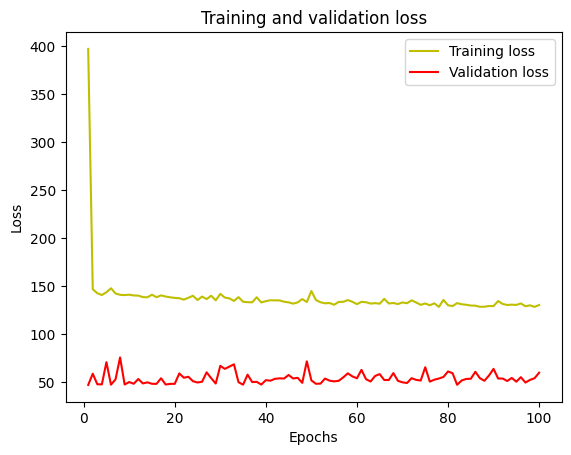

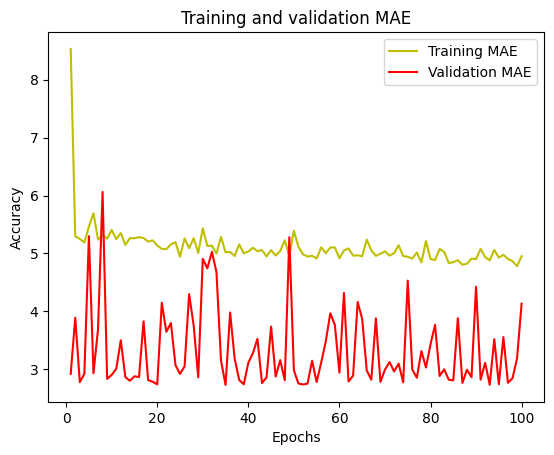

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
y_pred = model.predict(x_test)

19/19 [==============================] - 0s 765us/step


In [18]:
xs = np.arange(0, len(y_pred), 1)

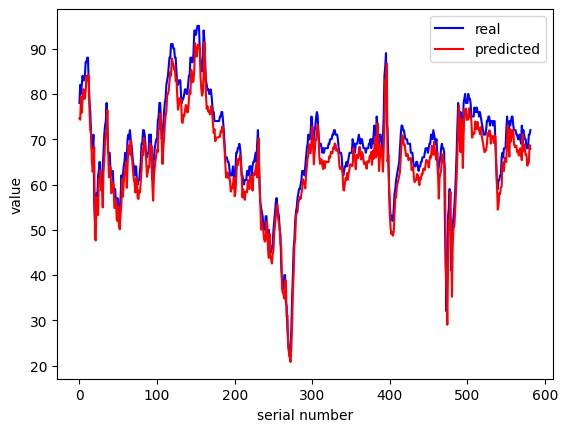

In [19]:
plt.plot(xs, y_test, color = 'blue', label = 'real')
plt.plot(xs, y_pred, color = 'red', label = 'predicted')
plt.xlabel('serial number')
plt.ylabel('value')

plt.legend()

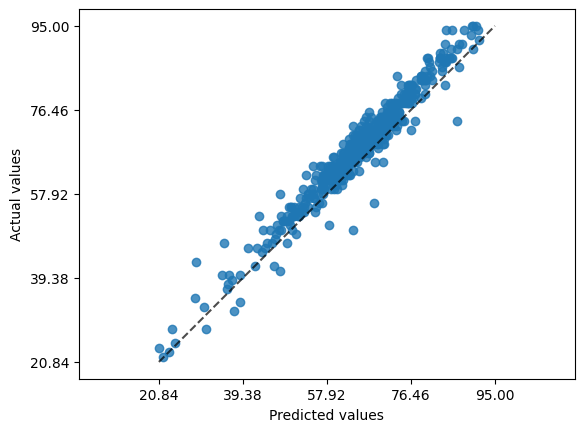

R2 Score: 0.8701988458633423
Mean Absolute Error: 3.489608699103811
Mean Squared Error: 16.26765386958267
Mean Absolute Percentage Error: 0.052421541023160614
Mean Absolute Error: 3.2546768188476562
Explained Varaince Score: 0.9466490567957438


In [20]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import explained_variance_score

import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay


display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred)
display.plot(kind="actual_vs_predicted")
plt.show()

print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred)}")
print(f"Mean Absolute Error: {median_absolute_error(y_test, y_pred)}")
print(f"Explained Varaince Score: {explained_variance_score(y_test, y_pred)}")